<a href="https://colab.research.google.com/github/gamsoulasieu2024-gif/Computer-programming/blob/main/DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

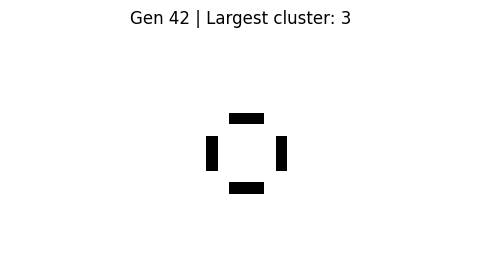

KeyboardInterrupt: 

In [ ]:
import random
import time
from collections import deque
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

# the configuration

WIDTH = 40      # number of columns
HEIGHT = 20     # number of rows
ALIVE = "█"     # character for alive cells (text mode)
DEAD = " "      # character for dead cells (text mode)


# util

def clear_screen():
    # Clear the output for google Colab
    clear_output(wait=True)


def make_grid(randomize=True):
    # Build a height times width grid.
    # Time:  O(H * W)
    # Space: O(H * W)

    grid = []
    for y in range(HEIGHT):
        row = []
        for x in range(WIDTH):
            if randomize:
                cell = 1 if random.random() < 0.25 else 0
            else:
                cell = 0
            row.append(cell)
        grid.append(row)
    return grid


def copy_grid(grid):
    # Time complexity: Copies each of the H×W cells once O(H * W)
    # Space complexity: Creates a full duplicate grid O(H * W)
    return [row[:] for row in grid]


# Actual game part of our code

def count_neighbors(grid, x, y):
    # Count alive neighbors around cell (x, y) with wrap-around edges
    # Always checks the 8 positions so time: O(1) and space: O(1)

    neighbors = 0
    for dy in (-1, 0, 1):
        for dx in (-1, 0, 1):
            if dx == 0 and dy == 0:
                continue  # skip the cell itself
            nx = (x + dx) % WIDTH
            ny = (y + dy) % HEIGHT
            neighbors += grid[ny][nx]
    return neighbors


def step(grid):
    # Compute the next generation from the current grid.
    # visit every cell once and does O(1) work per cell.
    # time:  O(H * W)
    # space: O(H * W) for the new grid.

    new_grid = []
    for y in range(HEIGHT):
        new_row = []
        for x in range(WIDTH):
            alive = grid[y][x] == 1
            neighbors = count_neighbors(grid, x, y)

            if alive:
                # Any live cell with two or three live neighbours will survive
                if neighbors == 2 or neighbors == 3:
                    new_row.append(1)
                else:
                    new_row.append(0)
            else:
                # Any dead cell with three live neighbours will become a live cell.
                if neighbors == 3:
                    new_row.append(1)
                else:
                    new_row.append(0)
        new_grid.append(new_row)
    return new_grid


# BFS: largest live cluster

def largest_live_cluster_size(grid):
    # Compute the size of the largest connected group ("cluster") of live cells.

    # treat the grid as an implicit graph:
    #   each cell is a node
    #   edges connect neighboring live cells (8-neighborhood with wrap-around)

    # run BFS from every unvisited live cell, using a queue, and keep the
    # maximum component size we find.

    # Let N = H * W.
    # time:  O(N) per call (each live cell is enqueued/dequeued at most once)
    # space: O(N) for the visited matrix + queue in the worst case.

    visited = [[False] * WIDTH for _ in range(HEIGHT)]
    max_size = 0

    for y in range(HEIGHT):
        for x in range(WIDTH):
            if grid[y][x] == 1 and not visited[y][x]:
                # start the bfs from this live cell
                queue = deque()
                queue.append((y, x))
                visited[y][x] = True
                current_size = 0

                while queue:
                    cy, cx = queue.popleft()
                    current_size += 1

                    # explore 8 neighbors with wrap around
                    for dy in (-1, 0, 1):
                        for dx in (-1, 0, 1):
                            if dx == 0 and dy == 0:
                                continue
                            ny = (cy + dy) % HEIGHT
                            nx = (cx + dx) % WIDTH

                            if grid[ny][nx] == 1 and not visited[ny][nx]:
                                visited[ny][nx] = True
                                queue.append((ny, nx))

                if current_size > max_size:
                    max_size = current_size

    return max_size


# starting patterns

def add_glider(grid):
    # places a glider pattern near the center of the grid
    mid_y = HEIGHT // 2
    mid_x = WIDTH // 2

    coords = [
        (mid_y,     mid_x + 1),
        (mid_y + 1, mid_x + 2),
        (mid_y + 2, mid_x),
        (mid_y + 2, mid_x + 1),
        (mid_y + 2, mid_x + 2),
    ]

    for y, x in coords:
        if 0 <= y < HEIGHT and 0 <= x < WIDTH:
            grid[y][x] = 1


def add_small_exploder(grid):
    # Place a 'small exploder' pattern near the center

    mid_y = HEIGHT // 2
    mid_x = WIDTH // 2

    coords = [
        (mid_y,     mid_x),
        (mid_y - 1, mid_x),
        (mid_y + 1, mid_x),
        (mid_y,     mid_x - 1),
        (mid_y,     mid_x + 1),
        (mid_y - 1, mid_x - 1),
        (mid_y - 1, mid_x + 1),
    ]

    for y, x in coords:
        if 0 <= y < HEIGHT and 0 <= x < WIDTH:
            grid[y][x] = 1


def manual_edit(grid):
    # let the person playing turn cells on manually by typing row,col.
    # for example typing in 5,10
    # input a blank input to finish

    print("\nYou chose an EMPTY grid.")
    print("Now you can add live cells manually.")
    print(f"Valid rows: 0 to {HEIGHT - 1}, valid cols: 0 to {WIDTH - 1}.")
    print("Type coordinates as 'row,col' (without quotes).")
    print("Press Enter on an empty line when you're done.\n")

    while True:
        s = input("Add live cell at (row,col) or press Enter to finish: ").strip()
        if s == "":
            break
        try:
            row_str, col_str = s.split(",")
            r = int(row_str)
            c = int(col_str)
            if 0 <= r < HEIGHT and 0 <= c < WIDTH:
                grid[r][c] = 1
            else:
                print("Out of bounds, try again.")
        except ValueError:
            print("Invalid format, use row,col (ex: 5,10).")


# the display part

def grid_to_string(grid, generation, largest_cluster=None, max_generations=None):
    # Render our grid as a multi-line string.
    # Time:  O(H * W)
    # Space: O(H * W)

    header = f"Conway's Game of Life - Generation {generation}"
    if max_generations and max_generations > 0:
        header += f"/{max_generations}"
    if largest_cluster is not None:
        header += f" | Largest live cluster: {largest_cluster} cells"

    lines = [header]
    for y in range(HEIGHT):
        line = []
        for x in range(WIDTH):
            line.append(ALIVE if grid[y][x] == 1 else DEAD)
        lines.append("".join(line))
    return "\n".join(lines)


# the visual mode (MATPLOTLIB)

def visual_mode(grid, max_generations):
    """
    Simple visual mode for Colab using matplotlib.
    Shows the grid as a black/white image and updates it automatically.
    """
    generation = 0

    while True:
        clear_output(wait=True)

        arr = np.array(grid)
        largest_cluster = largest_live_cluster_size(grid)

        plt.figure(figsize=(6, 3))
        plt.imshow(arr, cmap="binary", interpolation="nearest")
        title = f"Gen {generation}"
        if max_generations and max_generations > 0:
            title += f"/{max_generations}"
        title += f" | Largest cluster: {largest_cluster}"
        plt.title(title)
        plt.axis("off")
        plt.show()

        if max_generations > 0 and generation >= max_generations:
            print("Reached maximum number of generations.")
            break

        # advance one generation
        grid = step(grid)
        generation += 1
        time.sleep(0.2)   # control speed


# the main interactive loop

def main():
    # user chooses a starting pattern
    clear_screen()
    print("=== Conway's Game of Life ===")
    print("Choose starting pattern:")
    print("1) Random")
    print("2) Empty (you will manually add live cells)")
    print("3) Glider")
    print("4) Small exploder")

    choice = input("Enter 1, 2, 3, or 4: ").strip()

    if choice == "1":
        grid = make_grid(randomize=True)
    else:
        # Start from empty grid for all other choices
        grid = make_grid(randomize=False)

        if choice == "2":
            manual_edit(grid)
        elif choice == "3":
            add_glider(grid)
        elif choice == "4":
            add_small_exploder(grid)
        else:
            print("Invalid choice, defaulting to empty grid.")
            manual_edit(grid)

    # ask user for the max amount of generations
    # 0 will mean infinite generations
    while True:
        mg = input("Max generations (0 for infinite): ").strip()
        try:
            max_generations = int(mg)
            if max_generations < 0:
                print("Please enter 0 or a positive integer.")
                continue
            break
        except ValueError:
            print("Please enter a valid integer.")

    # choose mode: text vs visual
    print("\nChoose mode:")
    print("1) Text mode (ASCII + controls)")
    print("2) Visual mode (matplotlib image animation)")
    mode = input("Enter 1 or 2: ").strip()

    if mode == "2":
        # run visual mode and return
        visual_mode(grid, max_generations)
        return

    # TEXT SIMULATION LOOP (logique d'origine)

    generation = 0
    undo_stack = []  # stack of previous grids (for undo)

    while True:
        clear_screen()
        largest_cluster = largest_live_cluster_size(grid)
        print(grid_to_string(grid, generation, largest_cluster, max_generations))

        print("\nControls:")
        print("  [Enter] - next generation")
        print("  a       - auto-advance several generations")
        print("  u       - undo last generation")
        print("  q       - quit\n")

        # Stop automatically if we reached max_generations
        if max_generations > 0 and generation >= max_generations:
            print("Reached maximum number of generations.")
            break

        cmd = input("Command [Enter/a/u/q]: ").strip().lower()

        if cmd == "q":
            print("Quitting simulation.")
            break
        elif cmd == "u":
            if undo_stack:
                grid = undo_stack.pop()
                generation = max(0, generation - 1)
            else:
                print("Nothing to undo. Press Enter to continue.")
                input()
            continue
        elif cmd == "a":
            # Ask how many generations to auto-advance
            while True:
                steps_str = input("Advance how many generations? ").strip()
                try:
                    steps = int(steps_str)
                    if steps <= 0:
                        print("Please enter a positive integer.")
                        continue
                    break
                except ValueError:
                    print("Please enter a valid integer.")

            for _ in range(steps):
                # Check max generations inside the loop
                if max_generations > 0 and generation >= max_generations:
                    break
                undo_stack.append(copy_grid(grid))
                grid = step(grid)
                generation += 1
            continue
        else:
            # Default or Enter: step just one generation
            if max_generations > 0 and generation >= max_generations:
                print("Reached maximum number of generations.")
                break
            undo_stack.append(copy_grid(grid))
            grid = step(grid)
            generation += 1


# Run the game
main()
